In [17]:
# section 1 load all the necessary modules and packages
import glob
import time
import geopandas          as      gpd
import netCDF4            as      nc4
import numpy              as      np
import pandas             as      pd
import xarray             as      xr
from   shapely.geometry   import  Polygon
import matplotlib.pyplot  as      plt
import warnings
import sys
from   shapely.geometry   import  Polygon
import os
import shutil


<AxesSubplot:>

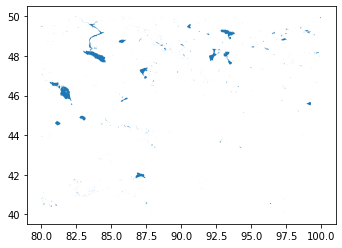

In [3]:
lakes = gpd.read_file('/Volumes/F:/hydrography/hydrolakes/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10_shp/HydroLAKES_polys_v10.shp')
lakes_slice = lakes[lakes['Pour_long']>80]
lakes_slice = lakes_slice[lakes_slice['Pour_long']<100]
lakes_slice = lakes_slice[lakes_slice['Pour_lat']>40]
lakes_slice = lakes_slice[lakes_slice['Pour_lat']<50]
lakes_slice = lakes_slice.drop(columns=["Slope_100"])
lakes_slice.plot()


/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_48545/3970560627.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cats['x'] = cats.centroid.x
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_48545/3970560627.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cats['y'] = cats.centroid.y


<AxesSubplot:>

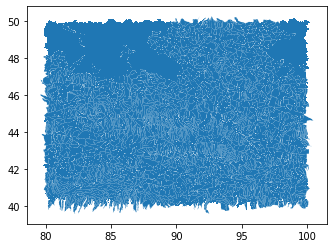

In [4]:
cats = gpd.read_file('/Volumes/F:/hydrography/HDMA/processed/hdma_global_catch_v2_1000000.gpkg')
cats['x'] = cats.centroid.x
cats['y'] = cats.centroid.y
cats_slice = cats[cats['x']>80]
cats_slice = cats_slice[cats_slice['x']<100]
cats_slice = cats_slice[cats_slice['y']>40]
cats_slice = cats_slice[cats_slice['y']<50]
cats_slice.plot()

/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_48545/1097532773.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rivs['x'] = rivs.centroid.x
/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_48545/1097532773.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rivs['y'] = rivs.centroid.y


<AxesSubplot:>

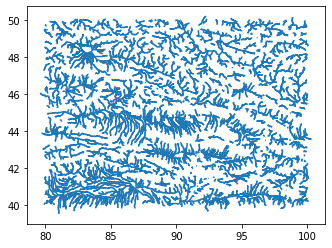

In [10]:
rivs = gpd.read_file('/Volumes/F:/hydrography/HDMA/processed/hdma_global_stream.shp')
rivs['x'] = rivs.centroid.x
rivs['y'] = rivs.centroid.y
rivs_slice = rivs[rivs['x']>80]
rivs_slice = rivs_slice[rivs_slice['x']<100]
rivs_slice = rivs_slice[rivs_slice['y']>40]
rivs_slice = rivs_slice[rivs_slice['y']<50]
rivs_slice.plot()

In [16]:
lakes_slice.to_file('/Users/shg096/Desktop/lakes_slice.shp')
cats_slice.to_file('/Users/shg096/Desktop/cats_slice.shp')
rivs_slice.to_file('/Users/shg096/Desktop/rivs_slice.shp')

In [15]:
lakes_slice

,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,...,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Wshd_area,Pour_long,Pour_lat,geometry
121,122,Zaysan,Kazakhstan,Asia,SWBD,3,4787,4193.60,1565.58,6.82,...,49800.0,1,12.6,802.318,764.6,388,143970.3,83.347580,49.655849,"POLYGON ((83.99003 49.75474, 83.99141 49.75473..."
123,124,Khyargas,Mongolia,Asia,SWBD,1,0,1383.23,251.99,1.91,...,0.0,1,54.4,55.312,15735.6,1029,146784.7,93.402083,49.114583,"POLYGON ((92.91631 49.32919, 92.91935 49.32799..."
126,127,Khar Us,Mongolia,Asia,Other,1,0,1120.49,256.48,2.16,...,0.0,1,2.8,33.300,1084.4,1156,68468.5,92.529583,48.321905,"POLYGON ((92.29838 48.34872, 92.30246 48.34782..."
130,131,Alakol,Kazakhstan,Asia,SWBD,1,0,2919.34,567.40,2.96,...,0.0,1,22.1,55.947,13347.0,347,63248.1,81.672917,46.152083,"POLYGON ((81.54844 46.50765, 81.55058 46.50721..."
1223,1224,Achit,Mongolia,Asia,SWBD,1,0,284.43,86.15,1.44,...,0.0,3,9.7,4.830,6592.1,1434,10337.8,90.646875,49.415050,"POLYGON ((90.58204 49.59850, 90.58268 49.59789..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366670,1366671,None,China,Asia,SWBD,1,0,0.41,3.24,1.43,...,0.0,3,5.7,0.392,69.1,1574,2517.4,95.851042,40.147215,"POLYGON ((95.85210 40.14862, 95.85381 40.14725..."
1366710,1366711,None,China,Asia,SWBD,1,0,0.18,2.38,1.59,...,0.0,3,1.4,34.286,0.1,1210,35270.8,99.358191,40.079321,"POLYGON ((99.36028 40.08228, 99.36179 40.08170..."
1366730,1366731,None,China,Asia,SWBD,1,0,0.72,3.99,1.33,...,0.0,3,3.4,0.001,28534.0,819,17.6,87.889583,40.059585,"POLYGON ((87.89328 40.06131, 87.89412 40.06011..."
1366755,1366756,None,China,Asia,SWBD,1,0,0.32,2.72,1.36,...,0.0,3,3.3,0.000,-1.0,816,2.3,87.871875,40.040352,"POLYGON ((87.87341 40.04392, 87.87392 40.04220..."


In [8]:
cats_slice

,hruid,PFAF,area_org,geometry,x,y
2736,1072494,10211,3.939142e+04,"POLYGON ((90.37333 40.20333, 90.37333 40.20250...",90.372361,40.202500
2737,1063342,102121,2.574454e+08,"POLYGON ((90.37167 40.20417, 90.37167 40.20083...",90.237233,40.111947
2738,1055910,1021221,2.262164e+08,"POLYGON ((89.97750 40.13417, 89.97750 40.13167...",89.993948,40.058648
2739,1048208,10212221,5.063082e+08,"POLYGON ((89.66000 40.19917, 89.66083 40.19917...",89.671155,40.097191
2740,1020600,102122221,4.732511e+08,"POLYGON ((89.49583 40.07667, 89.49583 40.07583...",89.290271,40.255490
...,...,...,...,...,...,...
39540,1042779,149993,2.455351e+08,"POLYGON ((97.42278 48.42069, 97.42278 48.41861...",97.400156,48.237543
39541,1006623,1499941,2.972356e+08,"POLYGON ((97.53944 48.04778, 97.53944 48.03528...",97.466638,47.997792
39542,1034537,149995,1.171452e+08,"MULTIPOLYGON (((97.62694 48.13319, 97.63111 48...",97.527880,48.131617
39543,1002036,1499961,2.595762e+08,"POLYGON ((97.74361 47.84986, 97.74153 47.84986...",97.643149,47.937177


In [9]:
rivs_slice

,BotElev,Length,OBJECTID,PFAF,PFAF_CODE,PF_TYPE,Shape_Leng,Slope,TopElev,Tosegment,end_x,end_y,flow_acc,seg_id,start_x,start_y,geometry,x,y
63759,391.0,1137.849410,NaN,10952922,1.095292e+11,7,0.009297,0.011425,404.0,1044895,84.567083,45.239583,250.216,1000029,84.563750,45.247500,"LINESTRING (84.56375 45.24750, 84.56375 45.246...",84.565342,45.243511
63795,1519.0,255.929375,NaN,1093182,1.093182e+11,6,0.003262,0.011722,1522.0,1053484,95.369583,48.461250,250.474,1000065,95.372500,48.460417,"LINESTRING (95.37250 48.46042, 95.37042 48.460...",95.370931,48.460567
63828,1063.0,735.153730,NaN,1099652,1.099652e+11,6,0.006482,-0.001360,1062.0,1065157,91.653750,45.571250,250.661,1000098,91.658333,45.566667,"LINESTRING (91.65833 45.56667, 91.65375 45.57125)",91.656042,45.568958
63890,1392.0,1264.866175,NaN,102389321,1.023893e+11,7,0.013148,0.005534,1399.0,1056590,81.413750,41.643750,251.118,1000160,81.403333,41.649167,"LINESTRING (81.40333 41.64917, 81.40458 41.647...",81.407979,41.645494
63897,2287.0,2245.760097,NaN,102389721,1.023897e+11,7,0.021571,0.061894,2426.0,1051439,80.851250,42.021250,251.159,1000167,80.860000,42.037083,"LINESTRING (80.86000 42.03708, 80.85875 42.037...",80.854600,42.029719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136061,827.0,96798.513809,NaN,102331,1.023310e+11,2,0.947021,0.000227,849.0,1072346,88.309583,40.131250,663846.000,1072331,87.657083,40.557917,"LINESTRING (87.65708 40.55792, 87.66042 40.557...",87.998208,40.353739
136076,830.0,3738.359408,NaN,102313,1.023130e+11,2,0.044690,-0.000802,827.0,1072351,88.348750,40.144583,671350.000,1072346,88.309583,40.131250,"LINESTRING (88.30958 40.13125, 88.31042 40.131...",88.328838,40.138709
136212,789.0,33470.552820,NaN,102133,1.021330e+11,2,0.261948,0.000120,793.0,1072483,90.400417,40.122083,773041.000,1072482,90.402917,39.883750,"LINESTRING (90.40292 39.88375, 90.40292 39.885...",90.414719,40.001850
136213,789.0,11663.533340,NaN,102131,1.021310e+11,2,0.093117,0.000000,789.0,1072494,90.372083,40.202083,773476.000,1072483,90.400417,40.122083,"LINESTRING (90.40042 40.12208, 90.40042 40.122...",90.386312,40.161988
